# Table of Contents
 <p><div class="lev1 toc-item"><a href="#固有値問題作成" data-toc-modified-id="固有値問題作成-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>固有値問題作成</a></div><div class="lev2 toc-item"><a href="#python-codeの確認" data-toc-modified-id="python-codeの確認-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>python codeの確認</a></div><div class="lev2 toc-item"><a href="#三次元での試作" data-toc-modified-id="三次元での試作-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>三次元での試作</a></div><div class="lev1 toc-item"><a href="#同次連立一次方程式の基本解" data-toc-modified-id="同次連立一次方程式の基本解-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>同次連立一次方程式の基本解</a></div><div class="lev2 toc-item"><a href="#写像のIm,-Ker" data-toc-modified-id="写像のIm,-Ker-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>写像のIm, Ker</a></div><div class="lev3 toc-item"><a href="#問題作成" data-toc-modified-id="問題作成-211"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>問題作成</a></div>

# 固有値問題作成

## python codeの確認
行列の固有値は以下の通り求められる．

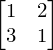

In [23]:
from sympy import *

#init_session()
#init_printing(use_unicode=True)
init_printing()
list_a = [1,2]
list_b = [3,1]
A=Matrix([list_a, list_b])
A

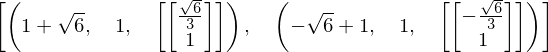

In [24]:
A.eigenvects()

しかし，これでは複雑すぎて試験には向かない．
行列の対角化を使えば，簡単に問題が作られる．
ところで，pythonでは対角化行列を作るのに手間が
かかる．そこでdiagonaizeを使う．

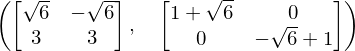

In [25]:
P, D =A.diagonalize()
P, D

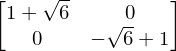

In [26]:
simplify(P.inv()*A*P)

逆に対角行列から問題の行列を作るのは次の通り．

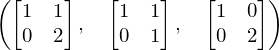

In [27]:
D = diag(1,2)
P = Matrix([[1,0],[1,1]]).T
A = P*D*P.inv()
A, P, D

## 三次元での試作

では作ってみましょう．

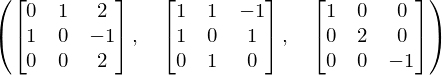

In [28]:
D = diag(1,2,-1)
P = Matrix([[1,1,0],[1,0,1],[-1,1,0]]).T
A = P*D*P.inv()
A, P, D

ゼロが多すぎて，簡単すぎるね．

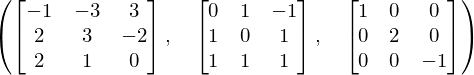

In [40]:
D = diag(1,2,-1)
P = Matrix([[0,1,1],[1,0,1],[-1,1,1]]).T
A = P*D*P.inv()
A, P, D

- ベクトルをいくつか入れ替えて出力を見ながら．．．
- 分数が要素に出てきた時は，diagを調整．
- 非対角要素に同じ数が二組出てくると簡単

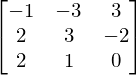

In [42]:
A

出力を右クリックして，Show Math AsでTeX Commandsを選択すると
``` latex
    \left[
    \begin{matrix}
      -1 & -3 & 3\\
      2 & 3 & -2\\
      2 & 1 & 0
    \end{matrix}
    \right]
```
とlatexで得られる．

# 同次連立一次方程式の基本解

echelon formから初めて，それらの線型結合で行列を作り，そこから確認する．

In [59]:
from sympy import *

init_session()
#init_printing(use_unicode=True)
#init_printing()
y1=Matrix([1,0,0,-5,5,2])
y2=Matrix([0,1,0,-3,2,0])
y3=Matrix([0,0,1,0,2,3])

IPython console for SymPy 1.0 (Python 3.6.1-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


In [60]:
z3=-2*y3-y2+y1
z2=y3+2*y2-y1
z1=y3+y2-y1


In [66]:
B=z1

In [72]:
BB=B.col_insert(1,z2).col_insert(2,z3).transpose()

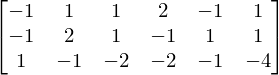

In [73]:
BB

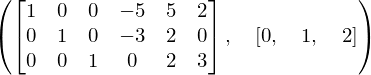

In [74]:
BB.rref()

In [75]:
BB.rank()

## 写像のIm, Ker

写像の変換行列が与えられた時，Imは`column space()`, Kerは`null space()`で容易に求められる．

In [79]:
from sympy import *

init_session()
#init_printing(use_unicode=True)
#init_printing()
AA= Matrix([[1,0,-1,1],
[2,-1,-1,3],
[-1,-1,2,0]])

IPython console for SymPy 1.0 (Python 3.6.1-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


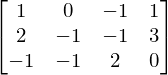

In [80]:
AA

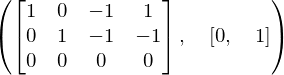

In [81]:
AA.rref()

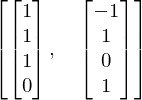

In [83]:
AA.nullspace()

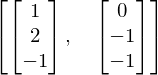

In [84]:
AA.columnspace()

### 問題作成

17-2r3.mwを変換すればよい．

ただし，変換の行列を求めさせるために，写像前後の座標を与えた場合，null spaceはバレバレなんで，あらかじめ線型結合で隠しておく必要がある．



In [85]:
BB=Matrix([1,1,4])

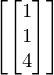

In [90]:
BB.columnspace()

In [88]:
BB